In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/sgoggins/Downloads/Data.csv')
data.head()

,repo_id,records,answers,question,announcement,appreciation,elaboration,humor,agreement,disagreement,negative_reaction,message_total
0,26101,3,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,10
1,26097,2,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,10
2,26100,24,0.5417,0.3750,0.0417,0.0000,0.0417,0.0000,0.0,0.0,0.0,10
3,25996,11,0.0909,0.5455,0.1818,0.0909,0.0000,0.0909,0.0,0.0,0.0,10
4,25621,11,0.0909,0.2727,0.2727,0.0909,0.2727,0.0000,0.0,0.0,0.0,11


In [3]:
data = data.loc[:, ['announcement', 'appreciation']]
data.head(481988)

,announcement,appreciation
0,0.0000,0.0000
1,1.0000,0.0000
2,0.0417,0.0000
3,0.1818,0.0909
4,0.2727,0.0909
...,...,...
226,0.0000,0.0000
227,0.2500,0.0000
228,0.0682,0.0227
229,0.0000,0.0000


In [4]:
X = data.values

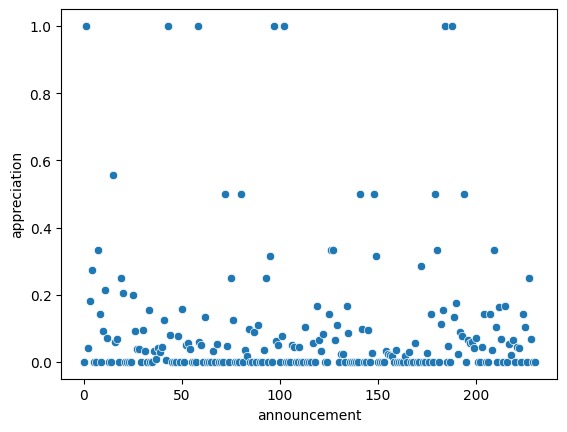

In [5]:
sns.scatterplot( X[:, 0])
plt.xlabel('announcement')
plt.ylabel('appreciation')
plt.show()

In [6]:
def calculate_cost(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
        return sum

In [7]:
def kmeans(X, k):
    diff = 1
    cluster = np.zeros(X.shape[0])
    centroids = data.sample(n=k).values
    while diff:
        # for each observation
        for i, row in enumerate(X):
            mn_dist = float('inf')
            # dist of the point from all centroids
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                # store closest centroid
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
                    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
                    # if centroids are same then leave
                    if np.count_nonzero(centroids-new_centroids) == 0:
                        diff = 0
    else:
        centroids = new_centroids
        return centroids, cluster

In [ ]:
cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

In [ ]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [ ]:
k = 4
centroids, cluster = kmeans(X, k)

In [ ]:
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('announcement')
plt.ylabel('appreciation')
plt.show()